# Exploratory Data Analysis (EDA)

Goal:
- Understand the structure and quality of the transcript data
- Identify trends, anomalies, and candidate metrics
- Inform later analysis and visualization decisions


In [220]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

project_root = Path().resolve().parents[0]
sys.path.append(str(project_root))

from src.ingest import ingest
from src.clean import clean


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Overview
Gain a basic understanding of the structure of the data.

In [221]:
path = Path(project_root) / "data" / "Transcript.csv"

df_raw = ingest(path)
df = clean(df_raw)

           Term      Course                            Desc Repeated  Units  \
0     2020 Fall    CMPT 128  Intro. Cmpt.Sci/Prgm/Engineers     EXCM      0   
1     2020 Fall   ENSC 100W  Engineering, Science & Society      NaN      3   
2     2020 Fall   ENSC 105W        Process of Prof. Writing      NaN      3   
3     2020 Fall    MATH 150        Calculus I with Review\r      NaN      4   
4     2020 Fall    PHYS 120    Mechanics and Modern Physics      NaN      3   
5   2021 Spring    ENSC 120        Intro to Instrumentation      NaN      2   
6   2021 Spring    ENSC 180  Introduction to Engineering An      NaN      3   
7   2021 Spring    MATH 152                     Calculus II      NaN      3   
8   2021 Spring    MATH 232          Applied Linear Algebra      NaN      3   
9   2021 Summer    CHEM 120             General Chemistry I      NaN      3   
10  2021 Summer    CHEM 125   STT-General Chemistry Lab I\r      NaN      1   
11  2021 Summer    MATH 260            Intro-Diff.Eq

In [222]:
df.head()

,Term,Course,Desc,Repeated,Units,Grade,GradePoints,ClassAverage,ClassEnrollment,GradePoint,ClassAvgGradePoint,Year,Dept,CourseLevel,Season
0,2020 Fall,CMPT 128,Intro. Cmpt.Sci/Prgm/Engineers,EXCM,0,A-,0.00,C+,140,3.67,2.33,2020,CMPT,100,Fall
1,2020 Fall,ENSC 100W,"Engineering, Science & Society",NaN,3,B+,9.99,B,138,3.33,3.00,2020,ENSC,100,Fall
2,2020 Fall,ENSC 105W,Process of Prof. Writing,NaN,3,A-,11.01,B,136,3.67,3.00,2020,ENSC,100,Fall
3,2020 Fall,MATH 150,Calculus I with Review\r,NaN,4,B+,13.32,B-,278,3.33,2.67,2020,MATH,100,Fall
4,2020 Fall,PHYS 120,Mechanics and Modern Physics,NaN,3,B+,9.99,B-,263,3.33,2.67,2020,PHYS,100,Fall


In [223]:
df.tail()

,Term,Course,Desc,Repeated,Units,Grade,GradePoints,ClassAverage,ClassEnrollment,GradePoint,ClassAvgGradePoint,Year,Dept,CourseLevel,Season
40,2025 Spring,CMPT 475,Requirements Engineering,NaN,3,A-,11.01,B,83,3.67,3.0,2025,CMPT,400,Spring
41,2025 Spring,INDG 101,Intro to Indigenous Studies,NaN,3,B+,9.99,B,107,3.33,3.0,2025,INDG,100,Spring
42,2025 Summer,CMPT 428,Practicum III,NaN,0,P,0.00,-,46,0.00,0.0,2025,CMPT,400,Summer
43,2025 Fall,CMPT 383,Programming Langs.,NaN,3,B+,9.99,B,104,3.33,3.0,2025,CMPT,300,Fall
44,2025 Fall,POL 150,"Science, Policy and Innovation",NaN,3,B,9.00,B,55,3.00,3.0,2025,POL,100,Fall


In [224]:
df.shape

(45, 15)

In [225]:
df.columns

Index(['Term', 'Course', 'Desc', 'Repeated', 'Units', 'Grade', 'GradePoints',
       'ClassAverage', 'ClassEnrollment', 'GradePoint', 'ClassAvgGradePoint',
       'Year', 'Dept', 'CourseLevel', 'Season'],
      dtype='object')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Term                45 non-null     object 
 1   Course              45 non-null     object 
 2   Desc                45 non-null     object 
 3   Repeated            2 non-null      object 
 4   Units               45 non-null     int64  
 5   Grade               45 non-null     object 
 6   GradePoints         45 non-null     float64
 7   ClassAverage        45 non-null     object 
 8   ClassEnrollment     45 non-null     int64  
 9   GradePoint          45 non-null     float64
 10  ClassAvgGradePoint  45 non-null     float64
 11  Year                45 non-null     int64  
 12  Dept                45 non-null     object 
 13  CourseLevel         45 non-null     int64  
 14  Season              45 non-null     object 
dtypes: float64(3), int64(4), object(8)
memory usage: 5.4+ KB


In [227]:
df_grade_filtered = df[(df["Grade"] != "P") & (df["Repeated"] != "EXCM")]
df_grade_filtered

,Term,Course,Desc,Repeated,Units,Grade,GradePoints,ClassAverage,ClassEnrollment,GradePoint,ClassAvgGradePoint,Year,Dept,CourseLevel,Season
1,2020 Fall,ENSC 100W,"Engineering, Science & Society",NaN,3,B+,9.99,B,138,3.33,3.00,2020,ENSC,100,Fall
2,2020 Fall,ENSC 105W,Process of Prof. Writing,NaN,3,A-,11.01,B,136,3.67,3.00,2020,ENSC,100,Fall
3,2020 Fall,MATH 150,Calculus I with Review\r,NaN,4,B+,13.32,B-,278,3.33,2.67,2020,MATH,100,Fall
4,2020 Fall,PHYS 120,Mechanics and Modern Physics,NaN,3,B+,9.99,B-,263,3.33,2.67,2020,PHYS,100,Fall
6,2021 Spring,ENSC 180,Introduction to Engineering An,NaN,3,B+,9.99,B,114,3.33,3.00,2021,ENSC,100,Spring
7,2021 Spring,MATH 152,Calculus II,NaN,3,B,9.00,B-,328,3.00,2.67,2021,MATH,100,Spring
8,2021 Spring,MATH 232,Applied Linear Algebra,NaN,3,B+,9.99,B-,236,3.33,2.67,2021,MATH,200,Spring
9,2021 Summer,CHEM 120,General Chemistry I,NaN,3,B-,8.01,B-,311,2.67,2.67,2021,CHEM,100,Summer
10,2021 Summer,CHEM 125,STT-General Chemistry Lab I\r,NaN,1,C+,2.33,B+,189,2.33,3.33,2021,CHEM,100,Summer
11,2021 Summer,MATH 260,Intro-Diff.Equations,NaN,3,B,9.00,B-,113,3.00,2.67,2021,MATH,200,Summer


Observations:
- Data appears to have no missing values
- Data was filtered to only include classes that count towards GPA for better analysis (Pass/fail and repeats excluded)

# Grade Distribution
Examine my overall grade distribtuion and the grade distribution of the averages.

In [228]:
df_grade_filtered["GradePoint"].describe()

count    40.000000
mean      3.482500
std       0.465666
min       2.330000
25%       3.330000
50%       3.330000
75%       3.752500
max       4.330000
Name: GradePoint, dtype: float64

<Axes: >

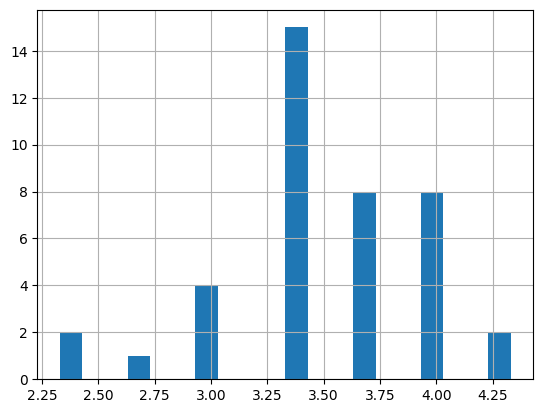

In [229]:
df_grade_filtered["GradePoint"].hist(bins=20)

<Axes: >

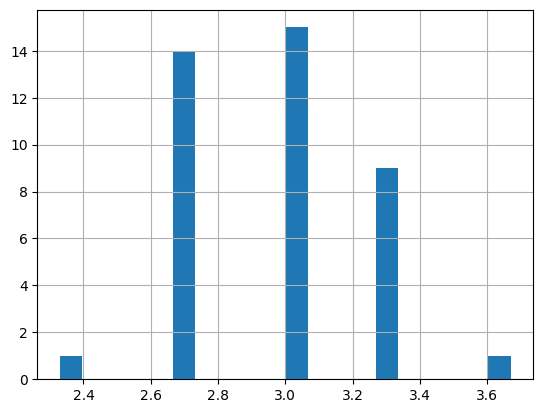

In [230]:
df_grade_filtered["ClassAvgGradePoint"].hist(bins=20)

<Axes: xlabel='GradePoint'>

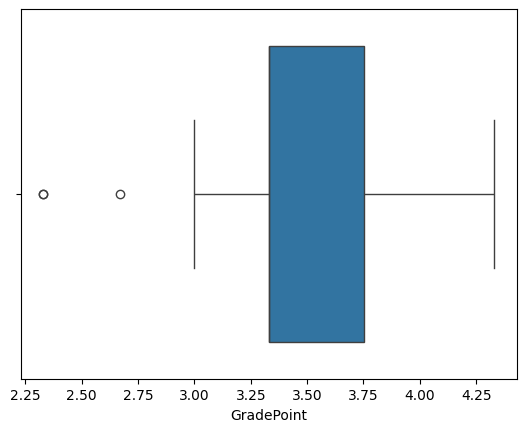

In [231]:
sns.boxplot(x=df_grade_filtered["GradePoint"])


<Axes: xlabel='ClassAvgGradePoint'>

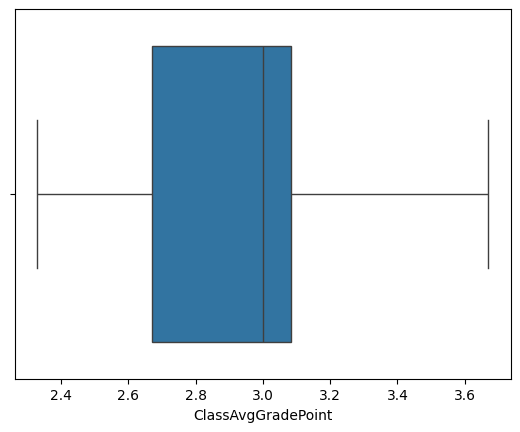

In [232]:
sns.boxplot(x=df_grade_filtered["ClassAvgGradePoint"])

Observations:
- My most median grade has been a B+ (3.33)
- My grades are highly clustered within the 3.33 to 3.75 range, with a couple outliers at 2.33 and 2.67
- Most of my classes had an average around a B (3.00) or B- (2.67)

# GPA over Time, Semester, Department, and Course Level
Examine grade averages by year, semester, season, department, and course level and look for any trends or outliers.

In [233]:
df_grade_filtered.groupby("Year")["GradePoint"].mean()

Year
2020    3.415000
2021    3.132000
2022    3.890000
2023    3.497500
2024    3.700000
2025    3.331667
Name: GradePoint, dtype: float64

In [234]:
df_grade_filtered.groupby("Term")["GradePoint"].mean()

Term
2020 Fall      3.415000
2021 Fall      4.000000
2021 Spring    3.220000
2021 Summer    2.732000
2022 Fall      3.890000
2022 Spring    4.000000
2022 Summer    3.670000
2023 Spring    3.497500
2024 Fall      4.000000
2024 Spring    3.667500
2024 Summer    3.443333
2025 Fall      3.165000
2025 Spring    3.415000
Name: GradePoint, dtype: float64

In [235]:
df_grade_filtered.groupby("Season")["GradePoint"].mean()

Season
Fall      3.690000
Spring    3.528235
Summer    3.073333
Name: GradePoint, dtype: float64

In [236]:
df_grade_filtered.groupby("Dept")["GradePoint"].mean()

Dept
CA      3.165000
CHEM    2.500000
CMPT    3.758333
ENSC    3.443333
GSWS    3.330000
IAT     3.670000
INDG    3.330000
MACM    3.670000
MATH    3.165000
PHYS    3.330000
POL     3.000000
PSYC    2.330000
STAT    4.000000
Name: GradePoint, dtype: float64

In [237]:
df_grade_filtered.groupby("CourseLevel")["GradePoint"].mean()

CourseLevel
100    3.253529
200    3.667500
300    3.574545
400    3.832500
Name: GradePoint, dtype: float64

In [238]:
df_grade_filtered.groupby("Dept")["Term"].count()

Dept
CA       2
CHEM     2
CMPT    18
ENSC     3
GSWS     1
IAT      1
INDG     1
MACM     3
MATH     4
PHYS     2
POL      1
PSYC     1
STAT     1
Name: Term, dtype: int64

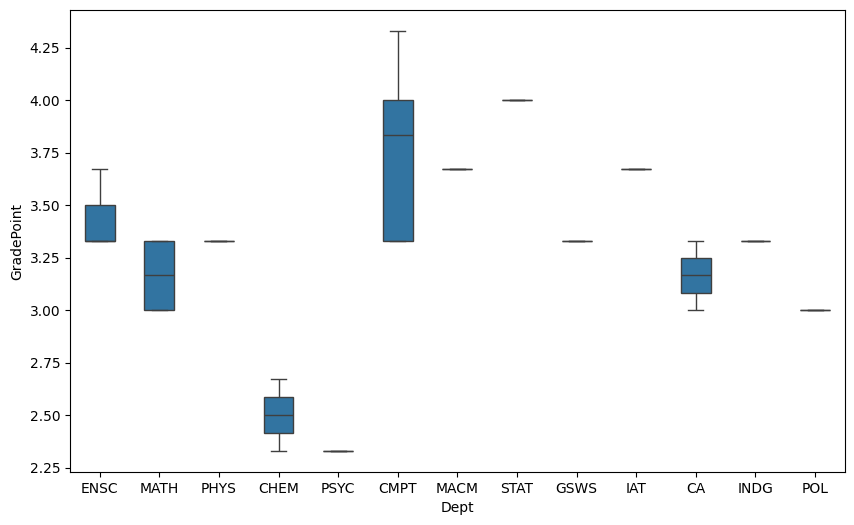

In [239]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Dept", y="GradePoint", data=df_grade_filtered, width=0.5)
plt.show()

In [240]:
df_grade_filtered.groupby("Term")["Units"].sum()

Term
2020 Fall      13
2021 Fall       6
2021 Spring     9
2021 Summer    13
2022 Fall       9
2022 Spring     6
2022 Summer     3
2023 Spring    12
2024 Fall       9
2024 Spring    12
2024 Summer     9
2025 Fall       6
2025 Spring    12
Name: Units, dtype: int64

<Axes: xlabel='Units', ylabel='GradePoint'>

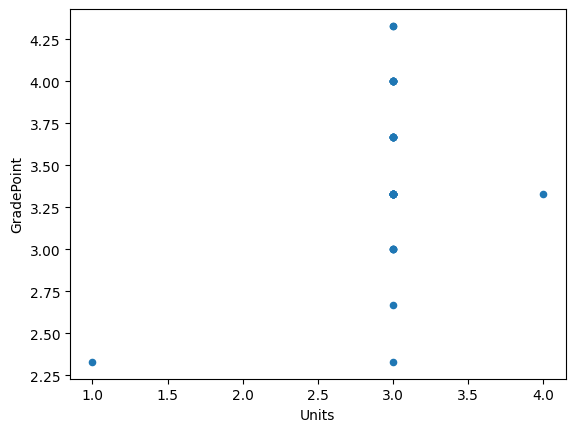

In [241]:
df_grade_filtered.plot.scatter(x="Units", y="GradePoint")

In [242]:
df_grade_filtered[["GradePoint", "Units", "CourseLevel", "Year", "ClassAvgGradePoint"]].corr()

,GradePoint,Units,CourseLevel,Year,ClassAvgGradePoint
GradePoint,1.000000,0.331848,0.399884,0.188538,-0.162039
Units,0.331848,1.000000,0.071049,0.025695,-0.253196
CourseLevel,0.399884,0.071049,1.000000,0.660280,0.140716
Year,0.188538,0.025695,0.660280,1.000000,0.362507
ClassAvgGradePoint,-0.162039,-0.253196,0.140716,0.362507,1.000000


Observations:
- Fall semester was my best performing semester on average
- A majority of my courses were CMPT
- I tend to perform better in 400 level courses than all others, 100 level courses have my lowest average. Correlation of ~0.4
- I am not good at Psychology 

Follow up:
- Define a difficulty index for courses and departments
- Weight GPA by credit load for final analysis
- Heatmap for correlation

# Performance comparison
Compare my performance to class averages over the year, semester, department, and course level.

<Axes: title={'center': 'GPA Comparison by Term'}, xlabel='Term', ylabel='GPATerm'>

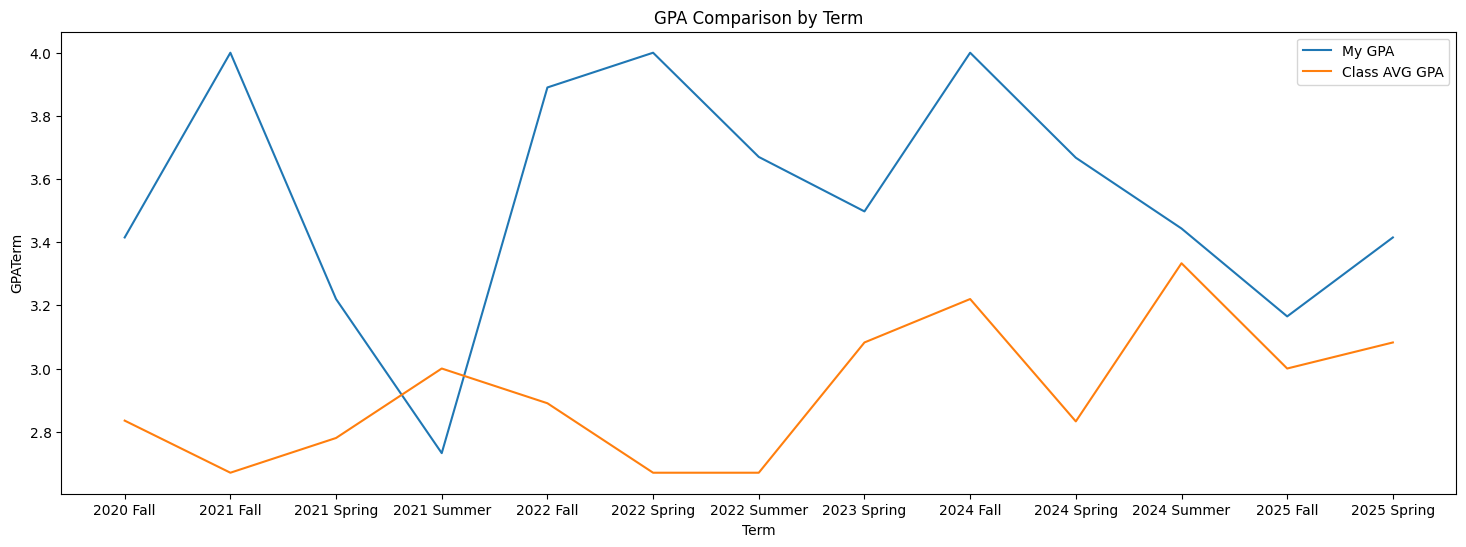

In [254]:
df_term_gpa_class_avg = df_grade_filtered.groupby("Term")["ClassAvgGradePoint"].mean().reset_index(name="ClassAvgGPATerm")
df_term_gpa = df_grade_filtered.groupby("Term")["GradePoint"].mean().reset_index(name="GPATerm")
plt.figure(figsize=(18,6))
plt.title("GPA Comparison by Term")
sns.lineplot(data=df_term_gpa, x="Term", y="GPATerm", label="My GPA")
sns.lineplot(data=df_term_gpa_class_avg, x="Term", y="ClassAvgGPATerm", label="Class AVG GPA")

<Axes: title={'center': 'GPA Comparison by Year'}, xlabel='Year', ylabel='GPAYear'>

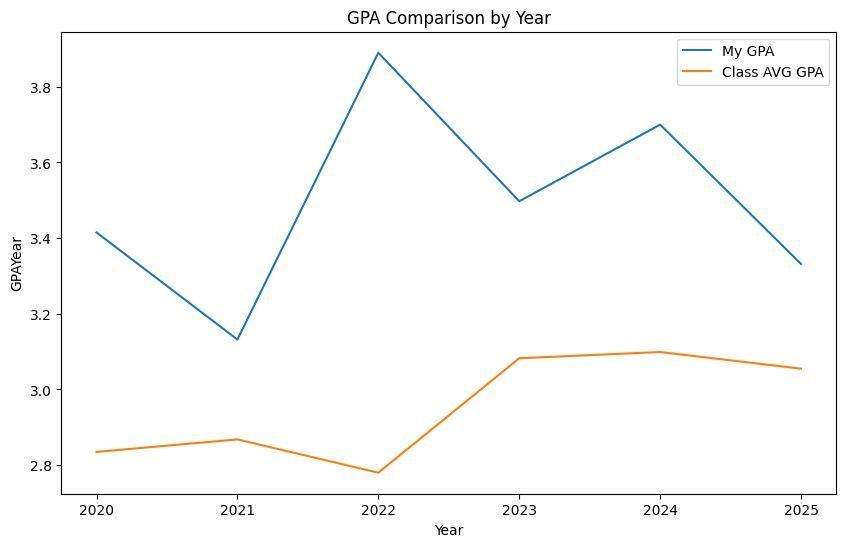

In [255]:
df_term_gpa_class_avg = df_grade_filtered.groupby("Year")["ClassAvgGradePoint"].mean().reset_index(name="ClassAvgGPAYear")
df_term_gpa = df_grade_filtered.groupby("Year")["GradePoint"].mean().reset_index(name="GPAYear")
plt.figure(figsize=(10,6))
plt.title("GPA Comparison by Year")
sns.lineplot(data=df_term_gpa, x="Year", y="GPAYear", label="My GPA")
sns.lineplot(data=df_term_gpa_class_avg, x="Year", y="ClassAvgGPAYear", label="Class AVG GPA")

<Axes: title={'center': 'GPA Comparison by Dept'}, xlabel='Dept', ylabel='GPADept'>

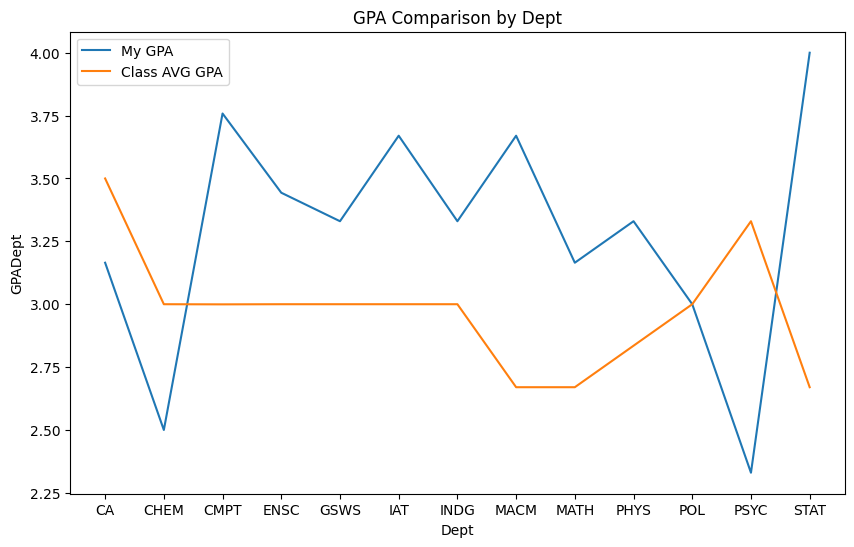

In [256]:
df_term_gpa_class_avg = df_grade_filtered.groupby("Dept")["ClassAvgGradePoint"].mean().reset_index(name="ClassAvgGPADept")
df_term_gpa = df_grade_filtered.groupby("Dept")["GradePoint"].mean().reset_index(name="GPADept")
plt.figure(figsize=(10,6))
plt.title("GPA Comparison by Dept")
sns.lineplot(data=df_term_gpa, x="Dept", y="GPADept", label="My GPA")
sns.lineplot(data=df_term_gpa_class_avg, x="Dept", y="ClassAvgGPADept", label="Class AVG GPA")

<Axes: title={'center': 'GPA Comparison by Course Level'}, xlabel='CourseLevel', ylabel='GPACourseLevel'>

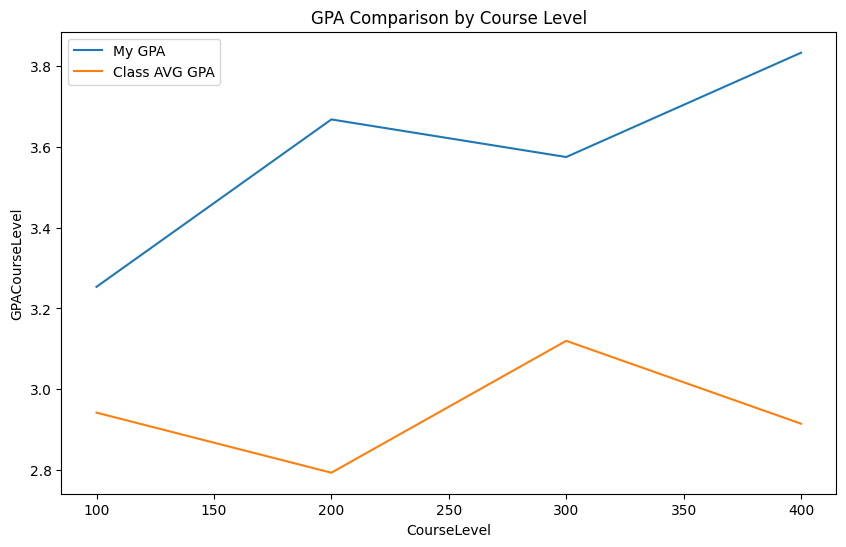

In [257]:
df_term_gpa_class_avg = df_grade_filtered.groupby("CourseLevel")["ClassAvgGradePoint"].mean().reset_index(name="ClassAvgGPACourseLevel")
df_term_gpa = df_grade_filtered.groupby("CourseLevel")["GradePoint"].mean().reset_index(name="GPACourseLevel")
plt.figure(figsize=(10,6))
plt.title("GPA Comparison by Course Level")
sns.lineplot(data=df_term_gpa, x="CourseLevel", y="GPACourseLevel", label="My GPA")
sns.lineplot(data=df_term_gpa_class_avg, x="CourseLevel", y="ClassAvgGPACourseLevel", label="Class AVG GPA")

Observations:
- Most of the time I tend to outperform the averages in my classes.
- Again, 400 level courses seem to be my best performing.
- My worst semester Summer 2021 was all online and included no classes from my major, possible explanation for poor performance.
- The one course in STAT I took I did really well in compared to the average.
- Once again, I am bad at Pyschology